## Problem Statement
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Explore the dataset and extract insights using Exploratory Data Analysis.

Do the users spend more time on the new landing page than the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

The idea behind answering these questions is to decide whether the new page is effective enough to gather new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('abtest.csv')

In [4]:
data.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [9]:
data.shape

(100, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


1. **user_id**: A unique identifier for each user, stored as an integer.
2. **group**: Indicates the group to which the user belongs (likely control or test groups for an A/B test), stored as an object (categorical).
3. **landing_page**: The specific landing page the user visited, stored as an object (categorical).
4. **time_spent_on_the_page**: The amount of time (in seconds) each user spent on the landing page, stored as a float.
5. **converted**: Indicates whether the user converted (possibly meaning whether they completed a desired action, such as a purchase), stored as an object (categorical).
6. **language_preferred**: The preferred language of the user, stored as an object (categorical).

The dataset is well-structured with no missing values, and it uses a combination of categorical and numerical data. Analyzing this data could help in understanding user behavior based on landing pages, time spent, and conversion rates, and it might also provide insights into how language preferences impact conversion. 

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


1. **time_spent_on_the_page**:
   - The mean time spent on the page is 5.38 seconds, with a standard deviation of 2.38 seconds, indicating some variation in how long users stayed on the page.
   - The minimum time spent is 0.19 seconds, while the maximum is 10.71 seconds.
   - The quartiles show that 25% of users spent up to 3.88 seconds, 50% spent up to 5.415 seconds (median), and 75% spent up to 7.02 seconds on the page.
   - This distribution suggests that most users spend between 3.88 and 7.02 seconds on the page, with a few users spending very brief or extended times, potentially indicating differences in engagement or interest.



In [12]:
data.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [13]:
data.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [16]:
data['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

In [17]:
data['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

In [18]:
data['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

In [19]:
data['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

## Univariate Analysis

In [57]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


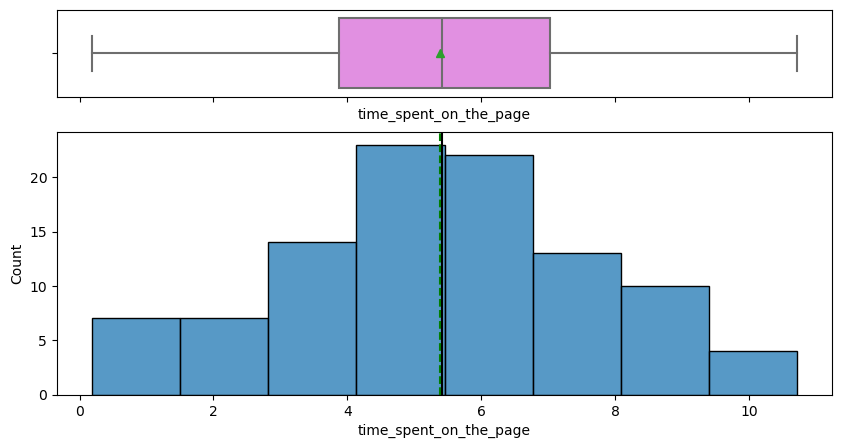

In [58]:
histogram_boxplot(data,"time_spent_on_the_page")

1. **Box Plot (Top)**:
   - The box plot shows that the time spent on the page is relatively concentrated, with no extreme outliers. The interquartile range (IQR) is between approximately 3.88 and 7.02 seconds, indicating that the majority of users spend this amount of time on the page.
   - The median time spent (represented by the center line in the box) is around 5.415 seconds, which aligns with the previously calculated median.

2. **Histogram (Bottom)**:
   - The histogram reveals that the distribution of time spent on the page is roughly bimodal, with two peaks around 4 and 6 seconds. This suggests there are two main groups of users: those who spend a shorter time (around 4 seconds) and those who stay a bit longer (around 6 seconds).
   - The distribution also shows a gradual decline in the number of users as the time spent increases beyond 8 seconds, with very few users reaching the maximum time of 10.71 seconds.

In [22]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

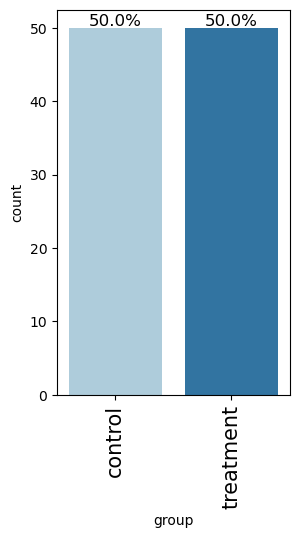

In [23]:
labeled_barplot(data,'group',perc = True)

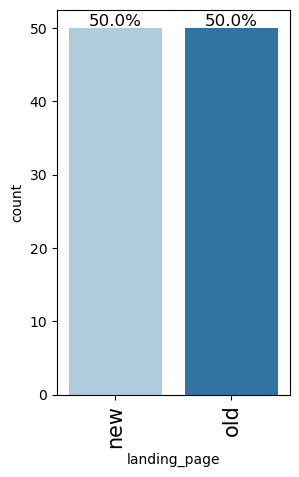

In [24]:
labeled_barplot(data,'landing_page',perc=True)

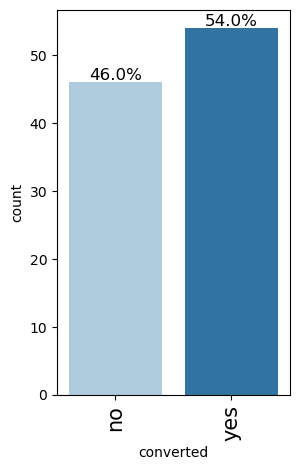

In [25]:
labeled_barplot(data,'converted',perc=True)

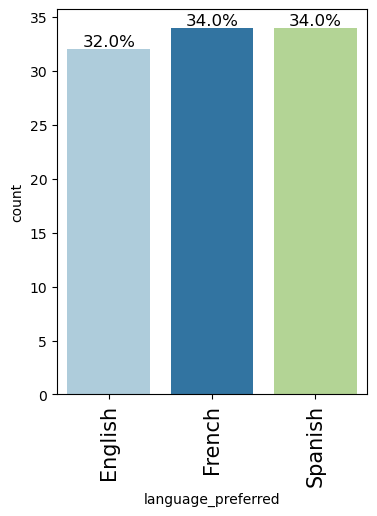

In [26]:
labeled_barplot(data,'language_preferred',perc=True)

## Bivariate Analysis

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


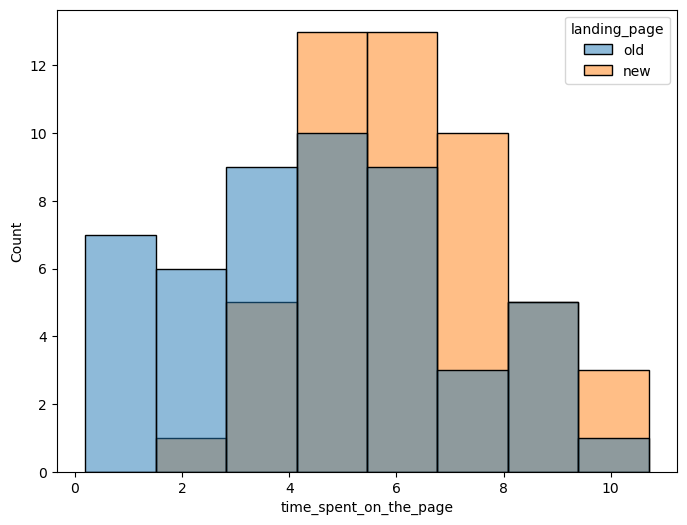

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data = data, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


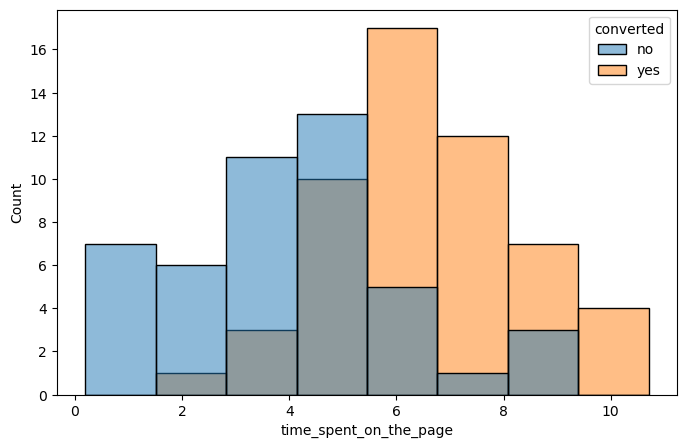

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(data = data, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

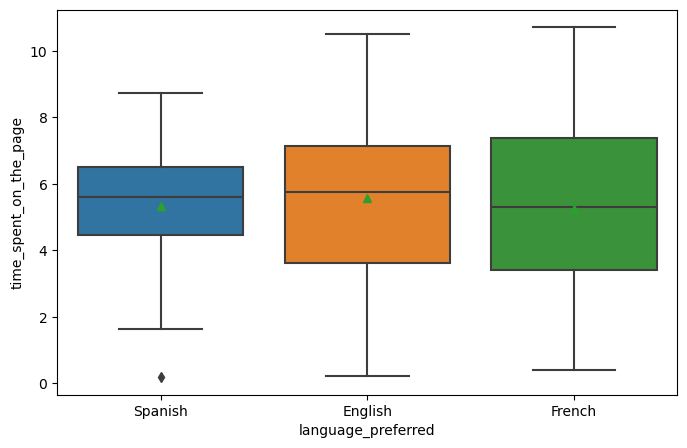

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = data)
plt.show()

### 2. Do the users spend more time on the new landing page than the existing landing page?

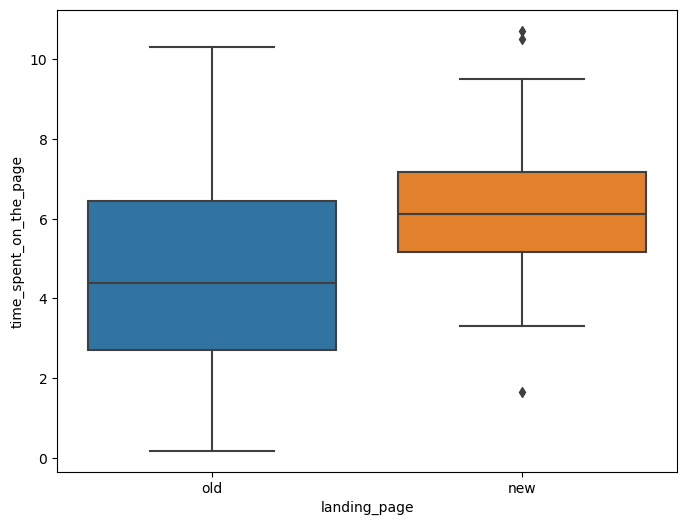

In [30]:
# visual analysis of the time spent on the new page
# and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

$H_a:$ The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [31]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [32]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [33]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


## Step 6: Compare the p-value with $\alpha$

In [34]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

### 3.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

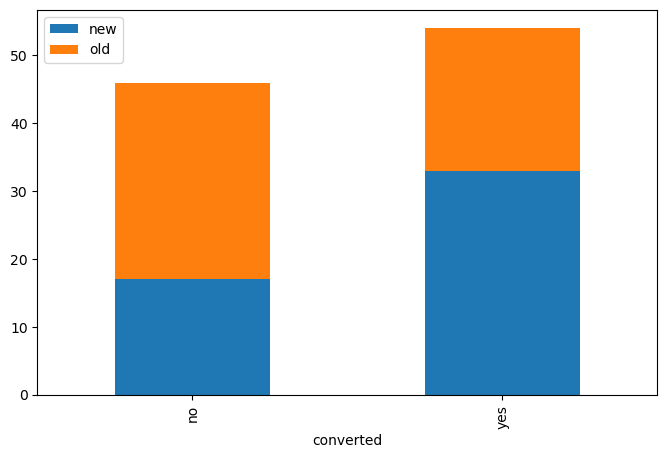

In [36]:
# visual analysis of the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['landing_page']).plot(kind="bar", figsize=(8,5),
                 stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ The conversion rate for the new page is equal to the conversion rate for the old page.

$H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.

Let $p_1$ and $p_2$ be the conversion rate for the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: p_1 = p_2$

$H_a: p_1 > p_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Hence, the two proportion z-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [37]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] # number of users in the control group
n_treatment = df.group.value_counts()['treatment'] #number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [38]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


## Step 6: Compare the p-value with $\alpha$

In [39]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.

### 4. Is the conversion and preferred language are independent or related?

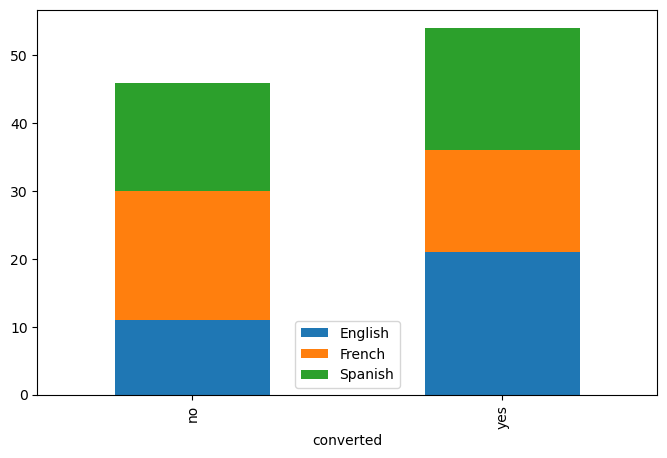

In [41]:
# visual analysis of the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred']).plot(kind="bar", figsize=(8,5),
                 stacked=True)
plt.legend()
plt.show()

 ### Step 1: Define the null and alternate hypotheses

$H_0:$ The converted status is independent of the preferred language.

$H_a:$ The converted status is not independent of the preferred language.

### Step 2: Select Appropriate test

This is a problem of Chi-square test of independence, concerning the two independent categorical variables, converted status and preferred language.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

#### Step 4: Collect and prepare data

In [42]:
# create the contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [43]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depends on the preferred language.

### 5. Is the time spent on the new page same for the different language users?

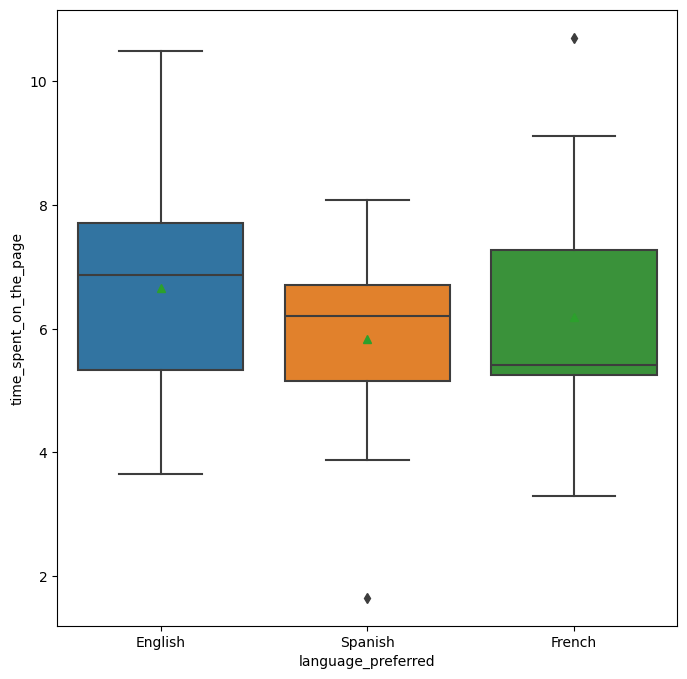

In [45]:
# visual analysis of the mean time spent on the new page for different language users
plt.figure(figsize=(8,8))
# create a new DataFrame for users served the new page
df_new = df[df['landing_page'] == 'new']
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [46]:
# Checking the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean times spent on the new page by English, French, and Spanish users are equal.

$H_a:$ At least one of the mean times spent on the new page by English, French, and Spanish users is unequal.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [47]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [49]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [51]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [52]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [53]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

### Conclusion 

It is recommended to adopt the new landing page as the primary interface for subscribers, as it has demonstrated higher conversion rates compared to the old design. The data also shows a positive correlation between time spent on the page and conversion rates, indicating that future designs should focus on enhancing user engagement by incorporating interactive or valuable content that encourages prolonged visits. Additionally, since language preference does not significantly impact conversion rates, resources could be more effectively allocated to improving the overall page design rather than making language-specific modifications.


The analysis indicates that the new landing page performs better in terms of user engagement and conversions. Therefore, implementing the new design is likely to boost subscriber numbers, particularly if the focus remains on maintaining engaging content that encourages users to spend more time on the site​.